In [140]:
import os
from PIL import Image
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import string

In [141]:
def mse(array):
    return np.mean(array.flatten() ** 2)

In [142]:
characters = os.listdir("./images")

input_matrix = np.zeros([26, 400], dtype='float')
expected_output_matrix = np.zeros([26, 400], dtype='float')
index = 0
for character in characters:
    vector = np.array(Image.open("./images/" + character)).reshape(1,-1)
    input_matrix[index] = vector
    expected_output_matrix[index] = vector
    index += 1

normalized_input = sklearn.preprocessing.normalize(input_matrix)

In [ ]:
weight = np.zeros([400, 400], dtype='float')
print(weight)
errors = np.zeros([26, 400], dtype='float')
mean_squared_error = 1

mse_iterations = []

learning_rate = 0.000001
error_threshold = 0.001

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [144]:
while mean_squared_error > error_threshold:
    for i in range(0, len(normalized_input)):
        a = np.dot(weight, normalized_input[i])
        e = expected_output_matrix[i] - a
        errors[i] = e
        weight = weight + 2 * learning_rate * e * normalized_input[i]
    mean_squared_error = mse(errors)
    mse_iterations.append(mean_squared_error)
    print(mean_squared_error)
    

print(weight)
print("Final MSE: " + str(mse(errors)))

53784.93116818412
53736.636397444134
53688.38946052667
53640.19031248583
53592.038908416995
53543.93520345672
53495.87915278272
53447.87071161387
53399.909835210135
53351.996478872505
53304.13059794305
53256.31214780474
53208.54108388156
53160.81736163839
53113.140936580945
53065.51176425581
53017.929800250335
52970.395000192686
52922.90731975168
52875.46671463688
52828.07314059847
52780.72655342721
52733.42690895452
52686.17416305229
52638.96827163295
52591.809190649336
52544.696876094786
52497.63128400301
52450.61237044801
52403.64009154421
52356.714403446225
52309.83526234895
52263.00262448751
52216.216446137165
52169.476683613335
52122.783293271525
52076.136231507306
52029.535454756275
51982.98091949403
51936.47258223611
51890.010399537954
51843.59432799495
51797.224324242234
51750.90034495482
51704.62234684748
51658.390286674716
51612.20412123072
51566.06380734939
51519.96930190419
51473.92056180822
51427.91754401413
51381.960205514086
51336.04850333975
51290.1823945622
51244.3618

KeyboardInterrupt: 

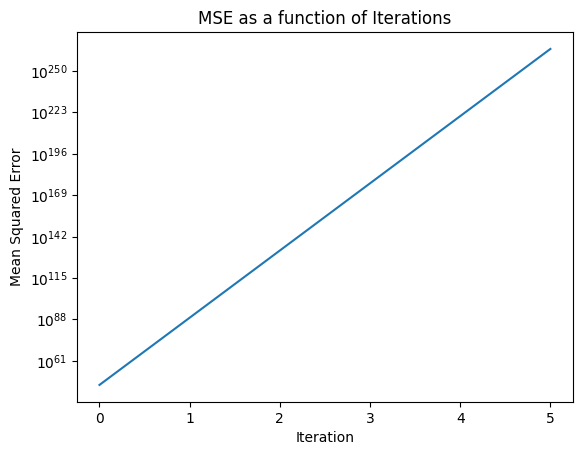

In [ ]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [ ]:

dt = np.dtype([('input', 'U2'), ('a', 'f8'), ('b', 'f8'), ('c', 'f8'), ('d', 'f8'), ('e', 'f8'), ('f', 'f8'), ('g', 'f8'), ('h', 'f8'), ('i', 'f8'), ('j', 'f8'), ('k', 'f8'), ('l', 'f8'), ('m', 'f8'), 
               ('n', 'f8'), ('o', 'f8'), ('p', 'f8'), ('q', 'f8'), ('r', 'f8'), ('s', 'f8'), ('t', 'f8'), ('u', 'f8'), ('v', 'f8'), ('w', 'f8'), ('x', 'f8'), ('y', 'f8'), ('z', 'f8')])
table = np.zeros(26, dtype=dt)
alphabet = string.ascii_lowercase
for i in range(0, len(table)):
    actual_output = np.dot(weight, normalized_input[i])
    table[i]['input'] = alphabet[i]
    for j in range(0, len(alphabet)):
        table[i][alphabet[j]] = mse(expected_output_matrix[j] - actual_output)
    
    # table[i] = np.array([(alphabet[i], mse(expected_output_matrix - actual_output), mse([1,0] - actual_output), mse([0,1] - actual_output), mse([0,0] - actual_output))], dtype=dt)

print("  MSE between each output and the 4 classes")
print(pd.DataFrame(table))

  MSE between each output and the 4 classes
   input   a   b   c   d   e   f   g   h   i  ...   q   r   s   t   u   v   w  \
0      a NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
1      b NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
2      c NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
3      d NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4      e NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
5      f NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
6      g NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
7      h NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
8      i NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
9      j NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
10     k NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN